### Note: most models apply to matrix only; remember to reshape(-1,1) if the design matrix is a single array

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split

# KNearest-Neighbors Classifier
KNN memorizes the whole training set; for a new instance, it picks the k nearest training sample, and predicts the label of the new instance by a majority voting in the k nearest neighbors.
Use the Breast Cancer Wisconsin (Diagnostic) Database as an example


In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
'''
Read in the data as a dataframe
'''
cancerdf = pd.DataFrame(data = cancer['data'], index = np.arange(569))
cancerdf.columns = cancer['feature_names']
cancerdf['target'] = cancer['target']

cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#feature and target
X_cancer = cancerdf[cancer['feature_names']]
y_cancer = cancerdf['target']
X_cancer.shape

(569, 30)

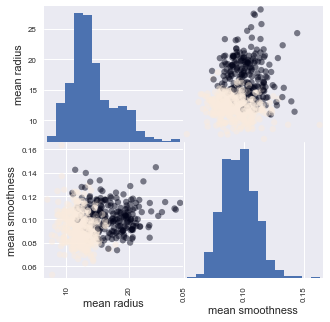

In [6]:
#Plot a scatter matrix to exam the data for radius and smoothness
scatter = pd.plotting.scatter_matrix(X_cancer[['mean radius','mean smoothness']], c= y_cancer, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(5,5))

In [8]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=143, random_state=0)

In [9]:
#build the knn model, choose k = 1 to begin with
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
# predict the test set
knn.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

In [11]:
# accuracy
knn.score(X_test,y_test)

0.91608391608391604

# KNN Regressor
When applying to regression, the KNN model uses the average of the nearest neighbors to predict the new instance's value

In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


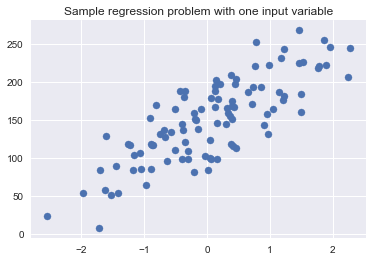

In [13]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))
# for regression, knnreg.score(X_test,y_test) return the R^2

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


# Linear Regression


## Basic Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
lin_reg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (weight w): {}'.format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'.format(lin_reg.intercept_))
print('R-squared score (test): {:.3f}'.format(lin_reg.score(X_test, y_test)))

linear model coeff (weight w): [ 45.70870465]
linear model intercept (b): 148.446
R-squared score (test): 0.492


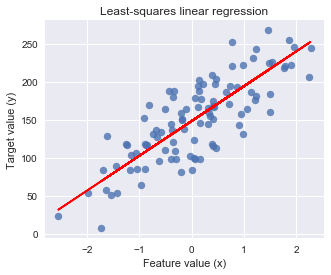

In [16]:
# plot the fitting line on the scatter plots
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

## Simple Linear with Ridge/Lasso Penalty
#### Ridge does L2 regularization; Lasso does L1 regularization; the regularization strength is controlled by alpha (default 1)
#### - Lasso sparses out the most important features with non-zero weights (forcing other features' coeffiecients to zero); 
#### - Ridge keeps all features.
#### - One note is that for highly correlated features, Lasso may just sparse out one among many.

### Ridge Regression 

In [18]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

lin_ridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(lin_ridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(lin_ridge.coef_))
print('R-squared score (test): {:.3f}'
     .format(lin_ridge.score(X_test, y_test)))


ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[ 36.26506226]
R-squared score (test): 0.545


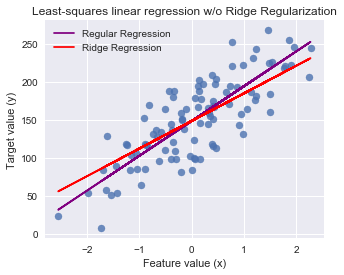

In [19]:
# plot the fitting line on the scatter plots

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'purple',label="Regular Regression")
plt.plot(X_R1, lin_ridge.coef_ * X_R1 + lin_ridge.intercept_, 'r-',label="Ridge Regression")

plt.title('Least-squares linear regression w/o Ridge Regularization')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend(loc='upper left')


### Ridge Regression with feature normalization
Coeffiecient regularization is sentitive to feature scale

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_ridge2 = Ridge(alpha=2.0).fit(X_train_scaled, y_train)

### Optimal alpha for regularization

Ridge regression: effect of alpha regularization parameter



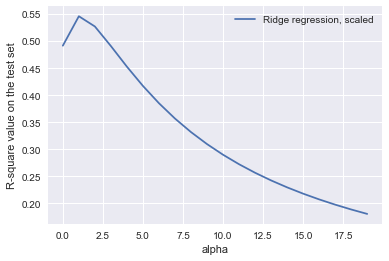

In [21]:
print('Ridge regression: effect of alpha regularization parameter\n')
list_alpha = range(0,20)
list_r2 = []
for alpha in list_alpha:
    lin_ridge2 = Ridge(alpha = alpha).fit(X_train_scaled, y_train)
    r2_test = lin_ridge2.score(X_test_scaled, y_test)
    list_r2.append(r2_test)
plt.plot(list_alpha,list_r2,label = 'Ridge regression, scaled')
plt.xlabel('alpha')
plt.ylabel('R-square value on the test set')
plt.legend(loc='upper right')


### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_lasso = Lasso(alpha=2.0).fit(X_train_scaled, y_train)

In [23]:
df_R2 = pd.DataFrame()
df_R2['Model'] = ['Simple Linear','Ridge','Ridge+Normalization','Lasso+Normalization']
df_R2['$R^2$ score (test)']= [lin_reg.score(X_test, y_test),lin_ridge.score(X_test, y_test),lin_ridge2.score(X_test_scaled, y_test),lin_lasso.score(X_test_scaled, y_test)]
df_R2

,Model,$R^2$ score (test)
0,Simple Linear,0.491596
1,Ridge,0.545123
2,Ridge+Normalization,0.180732
3,Lasso+Normalization,0.545091


## Polynomial Regression

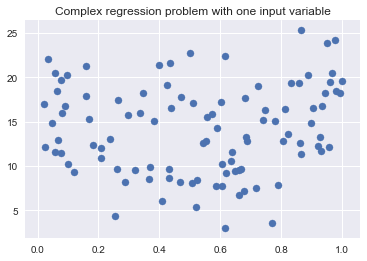

In [24]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
poly_reg = Ridge().fit(X_train, y_train)

In [26]:
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(poly_reg.score(X_test, y_test)))

(poly deg 2 + ridge) R-squared score (test): 0.825


### make_pipeline()
#### a method that can leverage polynomial degree and model fitting at the same time

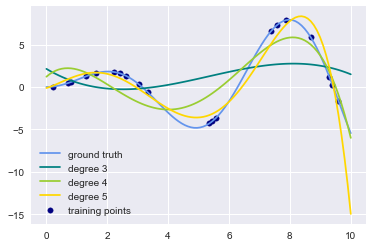

In [27]:
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x.reshape(-1,1)
X_plot = x_plot.reshape(-1,1)

colors = ['teal', 'yellowgreen', 'gold']
plt.plot(x_plot, f(x_plot), color='cornflowerblue', label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], label="degree %d" % degree)

plt.legend(loc='lower left')

# Logistic Regression
#### Logistic regression automatically has regularization whose strength is controlled by the inverse of parameter C (default 1.0)

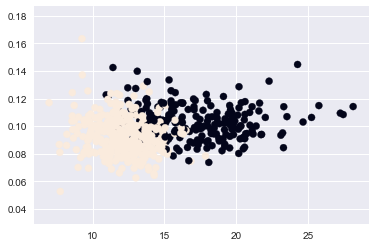

In [28]:
plt.scatter(X_cancer['mean radius'],X_cancer['mean smoothness'], c=y_cancer,marker= 'o', s=50)

In [35]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Logistic regression classifier on test set: 0.96


In [33]:

X_cancer.columns[0]
#'mean radius'
X_cancer.columns[4]
#'mean smoothness'
clf.coef_[0][0]
clf.coef_[0][4]

-0.12840859067084384

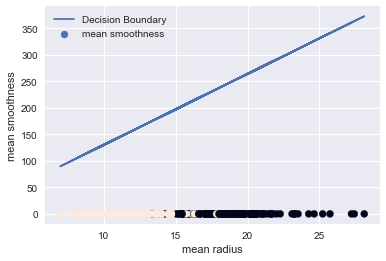

In [36]:
#plot decision boundary
plt.scatter(X_cancer['mean radius'],X_cancer['mean smoothness'], c=y_cancer,marker= 'o', s=50)
plt.plot(X_cancer['mean radius'],(0.5-clf.coef_[0][0]*X_cancer['mean radius'])/clf.coef_[0][4],label = 'Decision Boundary')
plt.xlabel('mean radius')
plt.ylabel('mean smoothness')
plt.legend(loc='upper left')

# SVM
#### SVM inserts a (n-1) dimensional manifold that maximizes the distance between two classes of points
#### SVM has multiple kernels (linear, RBF, etc.). The regularization term is controlled by parameter C

## Linear SVM
#### Linear SVM predict the classification by sign(w*x + b); the decision boundary is a (n-1) dimensional hyperplane
#### Linear SVM often results similar result to logistic regresion; though the latter has difficulty in classification around w*x + b = 0.5

In [37]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = LinearSVC().fit(X_train, y_train)
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on test set: 0.94


## SVM with RBF (Gaussian) kernel
#### RBF uses the Gaussian form function instead of dot product to calculate the "distance" between w*x and y
#### RBF kerneled SVM is controlled by two parameters: C, the regularization strength, and lambda, the inverse of variance in the Gaussian kernel

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)

print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


# Decision Trees

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.95


### variable importance

In [47]:
for i in range(len(iris.feature_names)):
    print(iris.feature_names[i], ':', clf.feature_importances_[i])

sepal length (cm) : 0.0
sepal width (cm) : 0.024579043971
petal length (cm) : 0.0759172387614
petal width (cm) : 0.899503717268


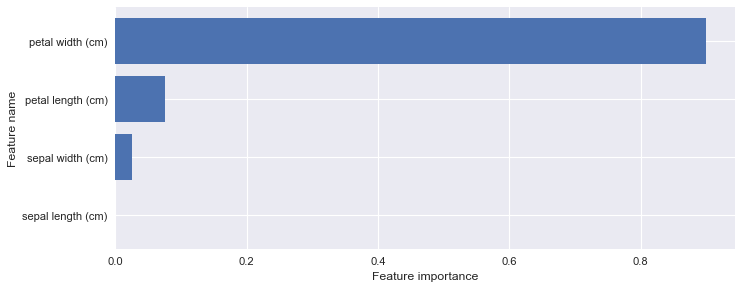

In [44]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)

#### Visualize desicion tree

In [49]:
import sys; sys.executable
!{sys.executable} -m pip install pydotplus

'C:\Users\yuchen' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="./adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("./adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)
plot_decision_tree(clf, iris.feature_names, iris.target_names)

NameError: name 'export_graphviz' is not defined

# Cross-validation

In [50]:
from sklearn.model_selection import cross_val_score